In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import rise_time as rt 

In [2]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421_0.npy'
coll=ca.NPYreader(filename,True).get_event()

<IPython.core.display.Javascript object>


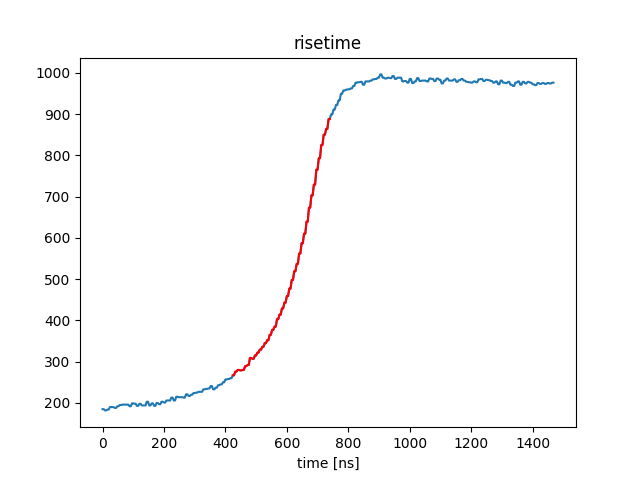

Text(0.5, 0, 'time [ns]')

In [3]:
traces=coll.get_traces()
plt.figure()

time=np.arange(0,len(traces[0]),1)*4
plt.plot(time,traces[0,:])

plt.title('risetime')
plt.xlabel('time [ns]',loc='center')

In [4]:
rtobj=rt.rise_time()
print('SSE rise time: '+str(rtobj.compute_rt(traces[0],4))+' ns')
plt.plot(time[rtobj.i_min : rtobj.i_max],traces[0][rtobj.i_min : rtobj.i_max],color='r')

SSE rise time: 320 ns


<IPython.core.display.Javascript object>


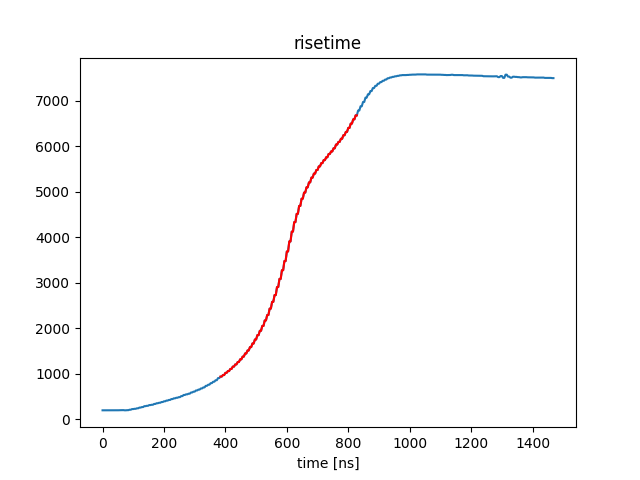

Text(0.5, 0, 'time [ns]')

In [5]:
plt.figure()
time=np.arange(0,len(traces[8]),1)*4
plt.plot(time,traces[8,:])

plt.title('risetime')
plt.xlabel('time [ns]',loc='center')

In [6]:
rtobj=rt.rise_time()
print('MSE rise time: '+str(rtobj.compute_rt(traces[8],4))+' ns')
plt.plot(time[rtobj.i_min : rtobj.i_max],traces[8][rtobj.i_min : rtobj.i_max],color='r')

MSE rise time: 448 ns


<IPython.core.display.Javascript object>


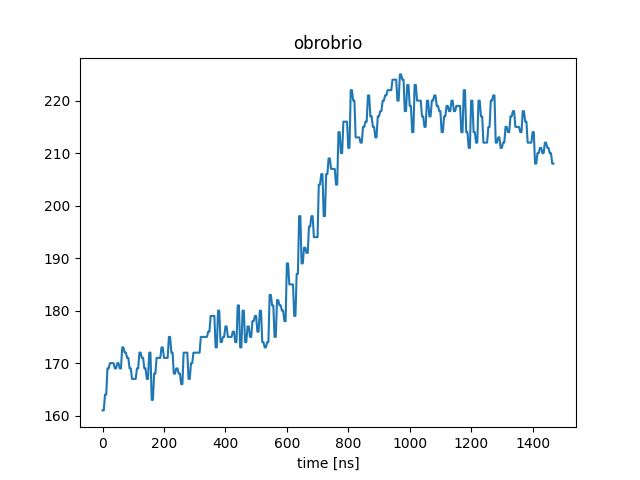

Text(0.5, 0, 'time [ns]')

In [8]:
plt.figure()
time=np.arange(0,len(traces[1]),1)*4
plt.plot(time,traces[3,:])

plt.title('obrobrio')
plt.xlabel('time [ns]',loc='center')